## Create mock light curve using PyTransit

In [258]:
#import libraries
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.animation as animation
import numpy as np
from pytransit import TransitAnalysis, create_mock_light_curve

In [259]:
#create fake light curve
#texp controls number of points on plot? 
time, flux, true_pars = create_mock_light_curve(texp=50, passband='TESS', noise=3e-4, transit_pars={'period':2.3})


Text(0.5, 1.0, 'Mock Light Curve')

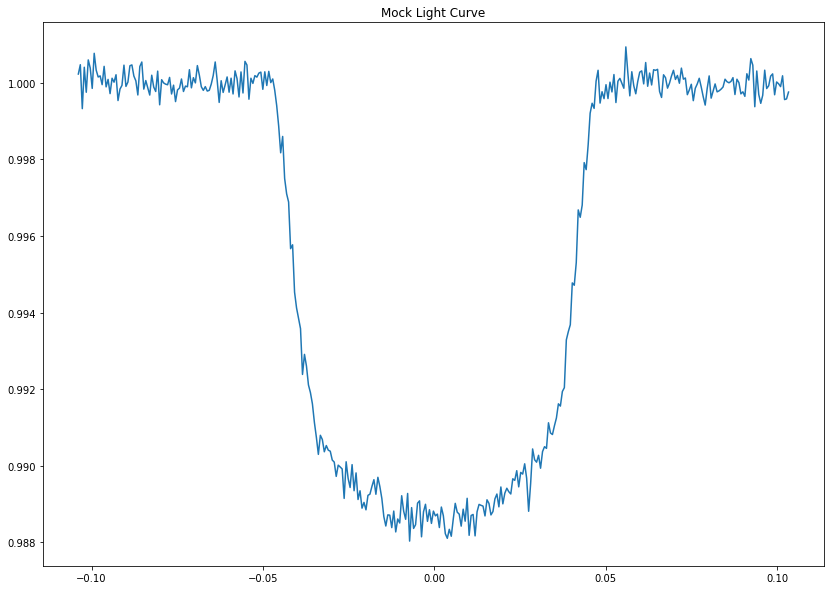

In [260]:
plt.figure(figsize = (14, 10))
plt.plot(time, flux)
plt.title('Mock Light Curve')

## Animating the light curve  

In [227]:
def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([min(x)-.01, max(x)+.01, min(y)-.01, max(y)+.01])
    return line,

In [228]:
#create dataframe
light_curve = pd.DataFrame(list(zip(time, flux)), columns = ['Time', 'Flux'])

#light_curve.to_csv('/Users/adarekar/Documents/NASASpaceApps/mock_light_curve.csv')

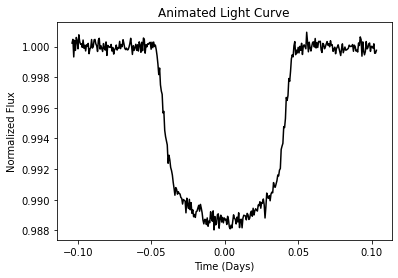

In [229]:
fig, ax = plt.subplots()
ax.set_title('Animated Light Curve')
ax.set_ylabel('Normalized Flux')
ax.set_xlabel('Time (Days)')
x = light_curve['Time']
y = light_curve['Flux']

line, = ax.plot(x, y, color='k')

In [230]:
ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=50, blit=False)

ani.save('/Users/adarekar/Documents/NASASpaceApps/lightcurveanimation.mp4', writer = 'ffmpeg')